In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [2]:
dataset1 = pd.read_csv('Dataset/natality2022ps.csv')

In [3]:
dataset1.shape

(23011, 237)

In [4]:
dataset2 = pd.read_csv('Dataset/natality2023ps.csv')

In [5]:
dataset2.shape

(22441, 237)

In [6]:
dataset3 = pd.read_csv('Dataset/natality2024ps.csv')

In [7]:
dataset3.shape

(22662, 237)

In [120]:
dataset.head(10)

,dob_yy,dob_mm,dob_tt,dob_wk,bfacil,f_bfacil,bfacil3,mage_impflg,mage_repflg,mager,...,ocntyfips,ocntypop,mbcntry,mrcntry,mrterr,rcnty,rcnty_pop,rcity_pop,rectype,preterm
0,2022,1,556,7,1,1,1,NaN,NaN,33,...,10,3,US,NaN,GU,10,3,NaN,2,0
1,2022,1,0,7,1,1,1,NaN,NaN,28,...,10,3,US,NaN,GU,10,3,NaN,2,0
2,2022,1,1,7,1,1,1,NaN,NaN,24,...,10,3,US,NaN,GU,10,3,NaN,2,0
3,2022,1,101,1,1,1,1,NaN,NaN,30,...,10,3,US,NaN,GU,10,3,NaN,2,0
4,2022,1,139,7,1,1,1,NaN,NaN,28,...,10,3,US,NaN,GU,10,3,NaN,2,1
5,2022,1,224,7,1,1,1,NaN,NaN,32,...,10,3,RP,NaN,GU,10,3,NaN,2,0
6,2022,1,721,7,1,0,1,NaN,NaN,28,...,10,3,FM,NaN,ZZ,999,Z,NaN,2,0
7,2022,1,806,7,1,1,1,NaN,NaN,33,...,10,3,KS,NaN,GU,10,3,NaN,2,0
8,2022,1,910,7,1,1,1,NaN,NaN,38,...,10,3,TW,NaN,GU,10,3,NaN,2,1
9,2022,1,942,7,1,1,1,NaN,NaN,29,...,10,3,FM,NaN,GU,10,3,NaN,2,0


In [8]:
# dataset1.columns == dataset2.columns

In [9]:
set1 = set(dataset1.columns)
set2 = set(dataset2.columns)
set3 = set(dataset3.columns)

print("1 vs 2:", set1 == set2)
print("1 vs 3:", set1 == set3)

# If you want to see differences:
print("Columns in dataset1 but not in dataset2:", set1 - set2)
print("Columns in dataset2 but not in dataset1:", set2 - set1)

print("Columns in dataset1 but not in dataset3:", set1 - set3)
print("Columns in dataset3 but not in dataset1:", set3 - set1)


1 vs 2: True
1 vs 3: True
Columns in dataset1 but not in dataset2: set()
Columns in dataset2 but not in dataset1: set()
Columns in dataset1 but not in dataset3: set()
Columns in dataset3 but not in dataset1: set()


In [10]:
cols = ['combgest',
 'gestrec10',
 'gestrec3',
 'lmpused',
 'oegest_comb',
 'oegest_r10',
 'oegest_r3']
for col in cols:
    print(col, sorted(dataset1[col].unique()))
    # print(col, sorted(dataset2[col].unique()))
    # print(col, sorted(dataset3[col].unique()))

combgest [20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 99]
gestrec10 [2, 3, 4, 5, 6, 7, 8, 9, 10, 99]
gestrec3 [1, 2, 3]
lmpused [nan]
oegest_comb [20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 47, 99]
oegest_r10 [2, 3, 4, 5, 6, 7, 8, 9, 10, 99]
oegest_r3 [1, 2, 3]


In [11]:
dataset = pd.concat([dataset1, dataset2, dataset3], ignore_index=False)
dataset.shape

(68114, 237)

In [12]:
print((dataset['combgest'] == 99).sum())
print((dataset['oegest_comb'] == 99).sum())
print(dataset['gestrec3'].value_counts())


104
104
2    58295
1     9715
3      104
Name: gestrec3, dtype: int64


In [13]:
dataset['combgest'] = dataset['combgest'].replace(99, pd.NA)
dataset = dataset.dropna(subset=['combgest'])
print(dataset['combgest'].isnull().sum())

0


# Defining Preterm Target

In [14]:
dataset['preterm'] = (dataset['combgest']<37).astype(int)

In [15]:
dataset['preterm'].value_counts()

0    58295
1     9715
Name: preterm, dtype: int64

# Visuablizing the preterm and not-preterm data

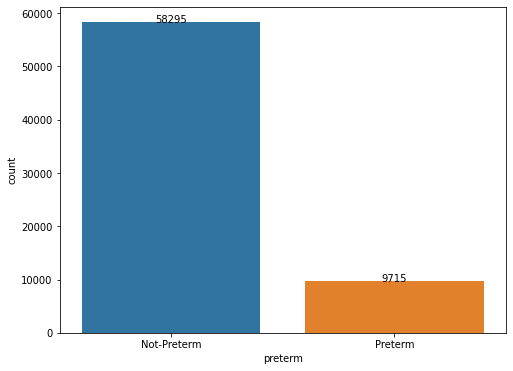

In [16]:
import seaborn as sns
plt.figure(figsize=(8, 6))
ax = sns.countplot(data=dataset, x='preterm')
plt.xticks([0, 1], ['Not-Preterm', 'Preterm'])
for p in ax.patches:
    # print(p)
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2., height + 0.5,int(height), ha='center')
plt.savefig('BeforeSplitting.png', dpi=300)
plt.show()

In [17]:
dataset.shape

(68010, 238)

In [18]:
# features that could directly define preterm or gestational age
cols_to_drop = ['combgest', 'gestrec3', 'gestrec10', 'oegest_comb', 'oegest_r10', 'oegest_r3', 'obgest_flg', 'compgst_imp']
X = dataset.drop(columns=cols_to_drop + ['preterm']).copy() # X = dataset.drop('preterm', axis=1)
y = dataset['preterm']
X.shape

(68010, 229)

# Train Test split

In [19]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# Visualizing the Preterm vs Not_Preterm in Train and Test

# Using Seaborn

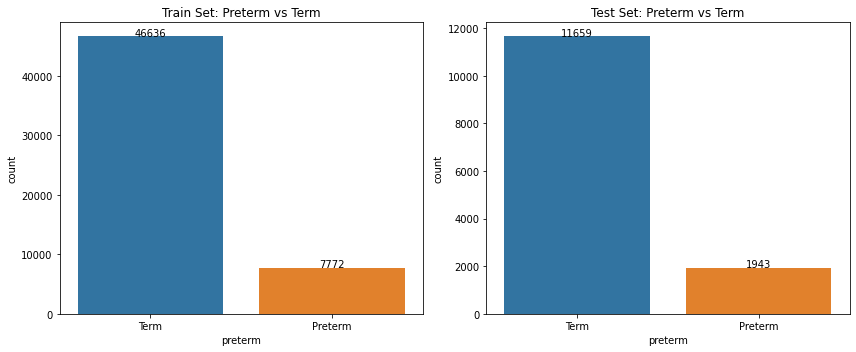

In [21]:
import seaborn as sns
import pandas as pd

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))
sns.countplot(x=y_train, ax=axes[0])
axes[0].set_xticks([0,1])
axes[0].set_xticklabels(['Term','Preterm'])
axes[0].set_title('Train Set: Preterm vs Term')
for p in axes[0].patches:
    # print(p)
    height = p.get_height()
    axes[0].text(p.get_x()+p.get_width()/2., height + 0.5,int(height), ha='center')

    

sns.countplot(x=y_test, ax=axes[1])
axes[1].set_xticks([0,1])
axes[1].set_xticklabels(['Term','Preterm'])
axes[1].set_title('Test Set: Preterm vs Term')
for p in axes[1].patches:
    # print(p)
    height = p.get_height()
    axes[1].text(p.get_x()+p.get_width()/2., height + 0.5,int(height), ha='center')
plt.tight_layout()
plt.show()


In [22]:
# dataset['combgest'].value_counts()

In [23]:
# [col for col in dataset1.columns]

# Same value columns and more than 80% missing value columns

In [24]:
same_value_cols = [col for col in X_train.columns if X_train[col].nunique()==1]
print("Columns with same value in all rows")
print(same_value_cols)

Columns with same value in all rows
['mage_impflg', 'mraceimp', 'mar_imp', 'imp_plur', 'imp_sex']


In [25]:
missing_80_cols = [col for col in X_train.columns if X_train[col].isnull().mean()>0.8]
print("Columns with more than 80% missing values: ")
print(missing_80_cols)

Columns with more than 80% missing values: 
['mage_impflg', 'mage_repflg', 'mraceimp', 'mar_imp', 'fagerpt_flg', 'imp_plur', 'imp_sex', 'lmpused', 'mrcntry', 'rcity_pop']


# Dropping columns From both Test and Train Data

In [26]:
cols_to_drop = list(set(same_value_cols + missing_80_cols))
X_train = X_train.drop(columns=cols_to_drop)
print(cols_to_drop)
remaining = [col for col in cols_to_drop if col in X_train.columns]
print("Columns still present after deletion (should be empty):")
print(remaining)

print("New Shape", X_train.shape)

['fagerpt_flg', 'mar_imp', 'mage_impflg', 'rcity_pop', 'imp_plur', 'mage_repflg', 'mrcntry', 'mraceimp', 'lmpused', 'imp_sex']
Columns still present after deletion (should be empty):
[]
New Shape (54408, 219)


In [27]:
# X_test = X_test.drop(columns=cols_to_drop)
print(cols_to_drop)
print("New Shape", X_test.shape)

['fagerpt_flg', 'mar_imp', 'mage_impflg', 'rcity_pop', 'imp_plur', 'mage_repflg', 'mrcntry', 'mraceimp', 'lmpused', 'imp_sex']
New Shape (13602, 229)


# Numerical columns vs Categorical Columns

In [103]:
print('All shape', X_train.shape)
num_cols = X_train.select_dtypes(include=['number']).columns.tolist()
print(len(num_cols))
cat_cols = X_train.select_dtypes(include=['object']).columns.tolist()
print(len(cat_cols))


All shape (54334, 186)
127
59


In [98]:
X_train.isnull().sum()[X_train.isnull().sum()>0]

Series([], dtype: int64)

In [105]:
binary_cols = [col for col in num_cols if X_train[col].nunique() <= 2]
numeric_cols = [col for col in num_cols if X_train[col].nunique() > 2]
print(len(binary_cols))
print(len(numeric_cols))

42
85


# Drop Redundant Flag (f_) Features with Corresponding Main Columns

In [102]:
f_cols = [col for col in X_train.columns if col.startswith('f_')]
print(len(f_cols))
for f_col in f_cols: 
    main_col = f_col[2:]
    if main_col in X_train.columns:
        X_train.drop(columns=[f_col], inplace=True)
        print(f"Dropped {f_col} because {main_col} exists")
    

40


In [96]:
X_train.shape

(54334, 186)

In [126]:
# for col in binary_cols:
#     print(col, X_train[col].unique())

In [110]:
corr = X_train[numeric_cols].corr()
corr.shape

(85, 85)

In [127]:
# import seaborn as sns
# plt.figure(figsize=(16, 14))
# sns.heatmap(corr>0.96, annot=True)
# plt.savefig('CorrelatedFeatures.png')
# plt.show()

In [85]:
X_train['feduc'].unique()

array([3, 7, 5, 4, 2, 6, 9, 1, 8], dtype=int64)

# "Remove Highly Correlated Numerical Features (Unique > 2)"

In [119]:
corr_pairs = []
for i in range(len(corr.columns)):
    for j in range(i):
        if corr.iloc[i, j]>0.9:
            corr_pairs.append((corr.columns[i], corr.columns[j], corr.iloc[i,j]))
            
corr_pairs


[('illb_r11', 'illb_r', 0.998724657905385),
 ('cig_1', 'cig_0', 0.993643601339031),
 ('cig_2', 'cig_0', 0.9934731410745458),
 ('cig_2', 'cig_1', 0.998771453118601),
 ('cig_3', 'cig_1', 0.901044052573923),
 ('cig_3', 'cig_2', 0.9013439078512663),
 ('dmeth_rec', 'me_rout', 0.9235903465964256),
 ('dlmp_yy', 'dlmp_mm', 0.9764175331174547)]

In [118]:
features_to_drop = ['mager9', 'mager14', 'mrace31', 'mrace15', 'wtgain_rec', 'pay_rec', 'bmi_r', 'pwgt_r', 'wtgain_rec', 'bwtr12',
                    'ocntyfips', 'cig0_r', 'cig1_r', 'cig2_r', 'cig3_r',  'apgar10r', 'rdmeth_rec', 'ilp_r11', 'ilop_r11', 'mhispx',
                   'frace31', 'frace15', 'fagerec11', 'fhispx']
len(features_to_drop)
85-24

61

In [ ]:
X_train.drop(columns=['dmeth_rec', 'dmeth_rec'])

In [111]:
X_train.drop(columns=features_to_drop, inplace=True)
print(X_train.shape)
X_test.drop(columns = features_to_drop, inplace=True)
print(X_test.shape)

(54334, 163)

In [117]:
num_cols = X_train.select_dtypes(include=['number']).columns.tolist()
binary_cols = [col for col in num_cols if X_train[col].nunique() <= 2]
numeric_cols = [col for col in num_cols if X_train[col].nunique() > 2]
print('Numerical colums', len(num_cols))
print('Binary numeric', len(binary_cols))
print('Numeric unique>2', len(numeric_cols))

Numerical colums 104
Binary numeric 42
Numeric unique>2 62


In [125]:
num_cols = X_train.select_dtypes(include=['object']).columns.tolist()
for col in num_cols:
    print(col, X_train[col].unique())

mar_p ['X' 'Y' 'U' 'N']
wic ['Y' 'N' 'U']
cig_rec ['N' 'U' 'Y']
rf_pdiab ['N' 'Y' 'U']
rf_gdiab ['N' 'Y' 'U']
rf_phype ['N' 'Y' 'U']
rf_ghype ['N' 'Y' 'U']
rf_ehype ['N' 'Y' 'U']
rf_ppterm ['N' 'Y' 'U']
rf_inftr ['N' 'Y' 'U']
rf_fedrg ['X' 'N' 'Y' 'U']
rf_artec ['X' 'Y' 'N' 'U']
rf_cesar ['N' 'Y' 'U']
ip_gon ['N' 'U' 'Y']
ip_syph ['N' 'U' 'Y']
ip_chlam ['N' 'Y' 'U']
ip_hepb ['N' 'U' 'Y']
ip_hepc ['N' 'Y' 'U']
ob_ecvs ['N' 'U' 'Y']
ob_ecvf ['N' 'U' 'Y']
ld_indl ['N' 'Y' 'U']
ld_augm ['N' 'Y' 'U']
ld_ster ['N' 'Y' 'U']
ld_antb ['N' 'Y' 'U']
ld_chor ['N' 'Y' 'U']
ld_anes ['N' 'Y' 'U']
me_trial ['X' 'N' 'Y' 'U']
mm_mtr ['N' 'Y' 'U']
mm_plac ['N' 'U' 'Y']
mm_rupt ['N' 'U' 'Y']
mm_uhyst ['N' 'U' 'Y']
mm_aicu ['N' 'U' 'Y']
mtran ['N' 'U' 'Y']
sex ['M' 'F']
ab_aven1 ['N' 'Y' 'U']
ab_aven6 ['N' 'Y' 'U']
ab_nicu ['N' 'Y' 'U']
ab_surf ['N' 'Y' 'U']
ab_anti ['N' 'Y' 'U']
ab_seiz ['N' 'Y' 'U']
ca_anen ['N' 'U']
ca_mnsb ['N' 'U' 'Y']
ca_cchd ['N' 'U' 'Y']
ca_cdh ['N' 'U' 'Y']
ca_omph ['N' 'U' 'Y']
c

# Dropping Irrelevant / foreign features for Nepal



In [123]:
foreign_feature = ['rcnty_pop', 'octerr', 'mrterr', 'mbcntry']
X_train.drop(columns=foreign_feature, inplace=True)
X_train.shape

(54334, 159)

In [124]:
foreign_feature = ['rcnty_pop', 'octerr', 'mrterr', 'mbcntry']
X_test.drop(columns=foreign_feature, inplace=True)
X_test.shape

C:\Users\ACER\anaconda3\envs\booksenv\lib\site-packages\pandas\core\frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


(13602, 202)